# Project 3 - Artificial Neural Networks

# Dataset 1: Flower Species Dataset

In [1]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids',
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

### Testing the Neural Network from scratch

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

# Loading Training Data
# X_train = np.load('flower_species_classification/data_train.npy').T
# t_train = np.load('flower_species_classification/labels_train.npy')

X_test = np.load("C:/Users/barla/Music/flower_species_classification/data_test.npy").T
t_test = np.load("C:/Users/barla/Music/flower_species_classification/labels_test.npy")

# Reshaping and normalizing the data
X_test = X_test.reshape(-1, 300, 300, 3) / 255.0

# Loading the trained model
flower_model = keras.models.load_model('flower_model.h5')

flower_model_preds_test = flower_model.predict(X_test)

print(classification_report(t_test,np.argmax(flower_model_preds_test, axis=1), target_names=class_names))

13/13 [==============================] - 3s 223ms/step
               precision    recall  f1-score   support

        Roses       0.89      0.85      0.87        48
    Magnolias       0.97      0.89      0.93        44
       Lilies       0.59      0.74      0.65        46
   Sunflowers       0.95      0.97      0.96        36
      Orchids       0.83      0.76      0.79        45
     Marigold       0.93      0.95      0.94        40
     Hibiscus       0.82      0.77      0.80        43
     Firebush       0.90      1.00      0.95        37
       Pentas       0.85      0.88      0.86        32
Bougainvillea       0.92      0.80      0.85        44

     accuracy                           0.85       415
    macro avg       0.87      0.86      0.86       415
 weighted avg       0.86      0.85      0.86       415



Confusion Matrix for the test set:


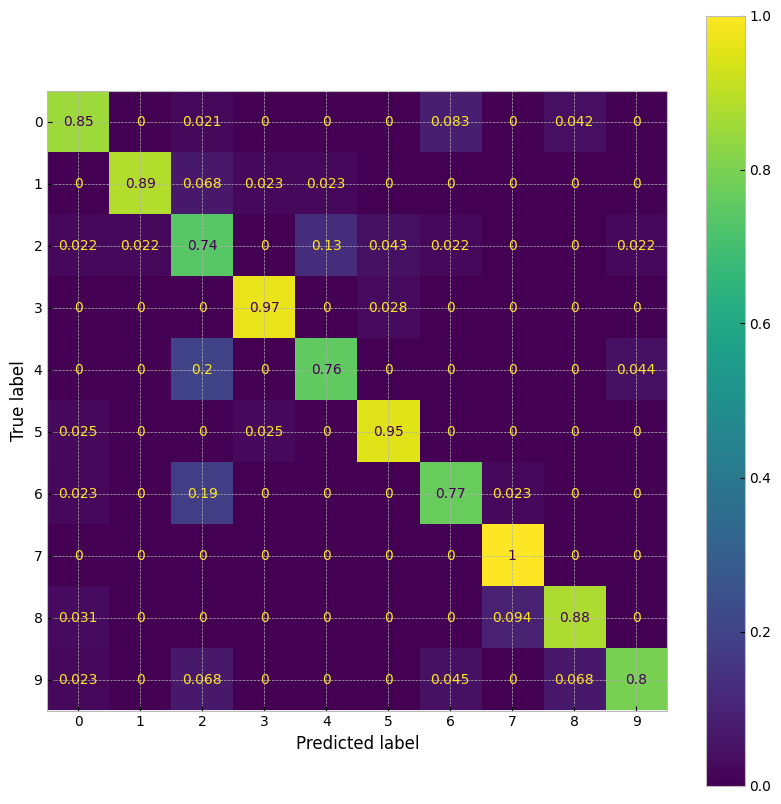

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('Confusion Matrix for the test set:')
cm = confusion_matrix(t_test, np.argmax(flower_model_preds_test, axis=1), normalize='true')
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

## Testing using Transfer learning with ResNet50

In [11]:
# Loading Training Data
# X_train = np.load('flower_species_classification/data_train.npy').T
# t_train = np.load('flower_species_classification/labels_train.npy')

X_test = np.load("C:/Users/barla/Music/flower_species_classification/data_test.npy").T
t_test = np.load("C:/Users/barla/Music/flower_species_classification/labels_test.npy")

# Reshaping and normalizing the data
X_test = X_test.reshape(-1, 300, 300, 3) / 255.0

# Reshaping and normalizing the data
X_test_scaled = X_test.reshape(-1, 300, 300, 3) / 255.0

# Reducing the pixel size of the images to facilitate limited computational resources
D = 150
X_test = np.array([cv2.resize(x.reshape(300,300,3),(D,D)) for x in X_test_scaled])

# Loading the trained model
flower_resnet = keras.models.load_model("flower_resnet.h5")

flower_resnet_preds_test = flower_resnet.predict(X_test)

print('Classification report on the Test set:')
print(classification_report(t_test,np.argmax(flower_resnet_preds_test, axis=1), target_names=class_names))

11/11 [==============================] - 5s 489ms/step - loss: 0.6028 - accuracy: 0.8886
Classification report on the Test set:
               precision    recall  f1-score   support

        Roses       0.87      0.75      0.81        36
    Magnolias       0.95      1.00      0.97        36
       Lilies       0.86      0.78      0.82        41
   Sunflowers       0.96      0.89      0.93        28
      Orchids       0.94      0.86      0.90        35
     Marigold       0.86      1.00      0.93        31
     Hibiscus       0.86      0.94      0.90        32
     Firebush       0.77      0.97      0.86        34
       Pentas       1.00      0.81      0.90        32
Bougainvillea       0.89      0.93      0.91        27

     accuracy                           0.89       332
    macro avg       0.90      0.89      0.89       332
 weighted avg       0.89      0.89      0.89       332



Confusion Matrix for the test set:


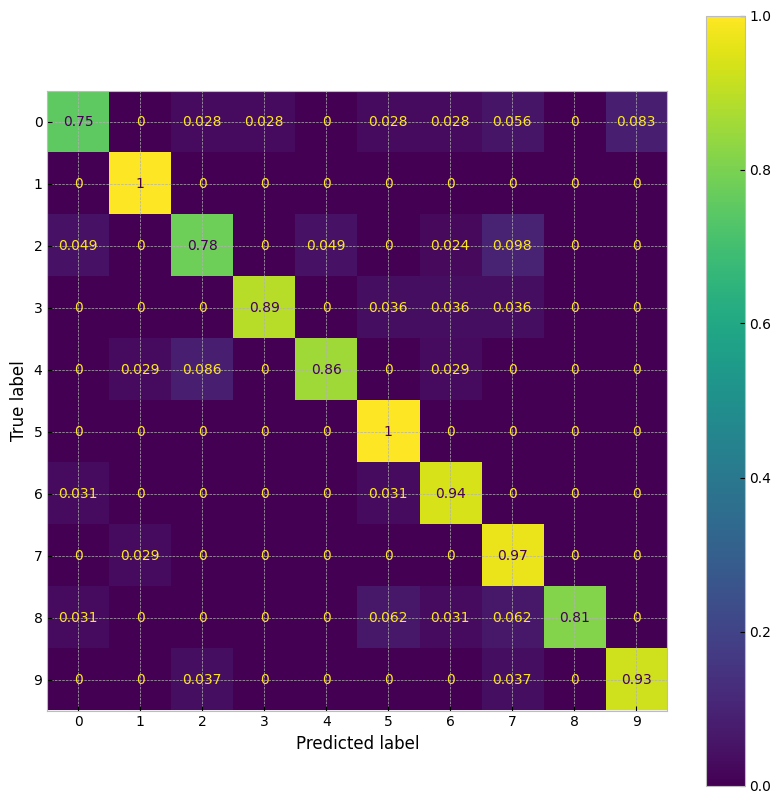

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('Confusion Matrix for the test set:')
cm = confusion_matrix(t_test, np.argmax(flower_resnet_preds_test, axis=1), normalize='true')
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

---

# Dataset 2: Car Detection Dataset

In [1]:
from PIL import Image
import cv2 # install opencv, if you don't already have it (https://pypi.org/project/opencv-python/)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Testing the YOLOv8 on the test set

In [1]:
from ultralytics import YOLO

# Importing the model
Yolo_trained = YOLO(r"C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\runs\detect\train\weights\best.torchscript")

# Testing the model on the Test set
results = Yolo_trained(r"C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images/")

Loading C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\runs\detect\train\weights\best.torchscript for TorchScript inference...

image 1/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25100.jpg: 640x640 (no detections), 245.0ms
image 2/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25120.jpg: 640x640 (no detections), 134.1ms
image 3/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25140.jpg: 640x640 (no detections), 65.0ms
image 4/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25160.jpg: 640x640 (no detections), 64.6ms
image 5/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25180.jpg: 640x640 (no detections), 66.5ms
image 6/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25200.jpg: 640x640 (no detections), 69.0ms
image 7/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_25220.jpg: 640x640 (no detections), 

image 69/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_27940.jpg: 640x640 2 cars, 67.3ms
image 70/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_27960.jpg: 640x640 (no detections), 70.0ms
image 71/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_27980.jpg: 640x640 (no detections), 67.0ms
image 72/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_28000.jpg: 640x640 1 car, 66.5ms
image 73/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_28020.jpg: 640x640 (no detections), 65.5ms
image 74/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_28040.jpg: 640x640 (no detections), 66.0ms
image 75/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_28060.jpg: 640x640 (no detections), 67.5ms
image 76/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_28080.jpg: 640x640 (no detections), 67.5ms
image 77/17

image 136/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30700.jpg: 640x640 (no detections), 70.0ms
image 137/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30720.jpg: 640x640 (no detections), 65.6ms
image 138/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30740.jpg: 640x640 1 car, 72.5ms
image 139/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30760.jpg: 640x640 1 car, 77.5ms
image 140/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30820.jpg: 640x640 1 car, 67.0ms
image 141/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30840.jpg: 640x640 (no detections), 66.1ms
image 142/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30860.jpg: 640x640 1 car, 75.3ms
image 143/175 C:\Users\barla\Music\CAR DETECTION\CAR DETECTION\testing_images\vid_5_30920.jpg: 640x640 1 car, 75.5ms
image 144/175 C:\Users\barla\Music

---

For the Object Detection task, since there are no target labels provided for the test set, one simple way to validate is by visual inspection. But this process is not optimal for large datasets, so by choosing a subset of dataset and manually giving them labels, we can validate the performance based on the ground truth labels.

In the availability of bounding box labels, to validate the performance on the test set, we can use Mean Average Precision (mAP) and Intersection over Union (IoU) metrics, which take into account the overlapping Regions of Interest (ROIs).

**IoU:** Intersection over Union measures the overlap between predicted and actual bounding boxes. It's calculated by dividing the area of overlap by the area of union of these boxes. In scenarios where there's an acceptable margin of error in bounding box location, IoU helps determine how 'close' the predictions are to potential true positives. A threshold (like 0.5) is often set, above which a prediction is considered a true positive.

**mAP:** This metric evaluates the model's precision across different levels of recall, essentially assessing how well the model detects objects (cars, in this case) across varying confidence thresholds. For each confidence level, precision and recall are calculated, and the average precision (AP) is derived. mAP is the mean of these APs across all classes or IoU thresholds. It's crucial when exact bounding box locations aren't the target but rather the model's overall ability to detect cars with a reasonable degree of accuracy.

For images without cars, we can add a fixed target label [0,0,0,0] during training. This teaches the model to recognize 'no car' scenarios. During validation, if the model predicts a bounding box where none should exist, it would negatively impact the mAP, as this would be a false positive.

---